# Exercise 11: Handling missing values using scikit-learn and pandas in preparation for statistical data analysis using SciPy

In today's class you will work through this exercise to perform exploratory data analysis to compare the GPP and SIF data. Specifically, we will explore how we deal with missing values before we perform a statistical analysis. This kind of exploratory data analysis is a crucial first step in analyzing your data.  

We will be using the GPP and SIF datasets contained in netcdf files that we have been using in previous classes.

Follow the instructions and type your answers in the code boxes with "# type your command here". There are also some questions to answer in the text boxes. A second jupyter notebook with the answers will be provided after the deadline.

Complete the whole assignment in this Jupyter Notebook and **upload it to Canvas by 1pm Monday 21st October**.

### 1. Loading GPP and SIF data

As you have done in previous in-class exercises, firs, download the GPP (orch_gpp_monthly_2007-2011.nc) and SIF (gome2_sif_monthly_2007-2011.nc) files and set the path to where the files are stored in our script. 

Then you need to import the netcdf library, open both the GPP and SIF netcdf files, and read in the data. 

You may need to query the variable keys to check the name of the SIF variable. Follow the instructions you have learned in previous classes to write the code you in the box below and run the code. Note! You will not just be able to use f=nc.Dataset() as we now need to open two files, therefore you will need to call them different names.

In [1]:
# type your commands here

In [3]:
import netCDF4 as nc
import numpy as np
gpp_file = 'orch_gpp_monthly_2007-2011.nc'
sif_file = 'gome2_sif_monthly_2007-2011.nc'
gpp_f=nc.Dataset(gpp_file,'r')
sif_f=nc.Dataset(sif_file,'r')
gpp_data = gpp_f.variables['GPP'][:]
sif_data = sif_f.variables['SIF'][:]

### 2. Exploratory comparison of GPP and SIF - the issue of missing values

As I mentioned in the previous in-class exercises, SIF should be a good proxy of GPP. If you compare the var info for GPP to SIF using the commands we learned in previous exercises you will see that the units of GPP are not the same as for SIF - this is why we see different ranges of data in the maps we plotted in Exercise 9. Therefore, we cannot directly compare the absolute values of GPP and SIF. When we plotted the maps we could visually compare their spatial distributions - but it is only easy to see large scale patterns. To really compare the data we would need to normalize or scale both datasets. 

However, we are not interested in comparing the absolute values of GPP and SIF as the values are not the same. Instead, we are mostly interested in comparing the temporal patterns - i.e. the correlation between the two datasets. We don't need to scale the data for this. We can visualize how well correlated the two datasets are using a scatter plot. We have plotted scatter plots many times. Type your code to plot the scatter plot between GPP and SIF in the box below:

In [28]:
# type your commands here

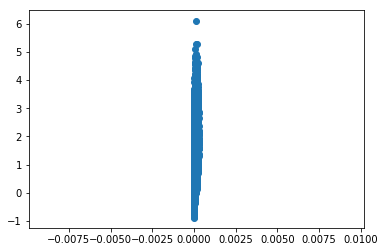

In [29]:
plt.scatter(gpp_data, sif_data)

However, there is one more step. Given the two datasets have different ranges, if you simply plot a scatter plot you will likely not have seen any positive correlation between the datasets. 

If GPP is on the x-axis and SIF is on the y-axis in your scatter plot above, you will likely have seen a vertical thin spread of points. This is because the default x-axis range is much bigger than the range of the GPP numbers. 

We need to re-scale the axes. Re-plot your scatter plot in the box below and use   
**plt.xlims((xmin,xmax))**  
and  
**plt.ylims((ymin,ymax))**  
to re-scale the axes. 

You can estimate the min or max for each dataset or use numpy commands to do so. Also, add labels to your axes.

In [30]:
# type your commands here

-1.3347748297584611e-05 0.0002975991429021965


Text(0,0.5,'SIF')

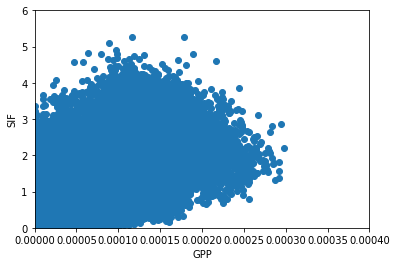

In [31]:
print (np.min(gpp_data), np.max(gpp_data))
plt.scatter(gpp_data, sif_data)
plt.xlim((0,0.0004)) #--> try this now - see introduction to data visualization in python
plt.ylim((0,6))
plt.xlabel('GPP')
plt.ylabel('SIF')

We should now see much more of a spread in the GPP data and more of a relationship between GPP and SIF. 

- *From this scatter plot, do you think GPP and SIF are positively correlated?*

In the scatter plot above we have included all the terrestrial grid points. It is not that surprising that a really clear and well-defined relationship does not emerge. 

While we're exploring our data, we may as well look at a simple timeseries plot of both GPP and SIF from one (or several) grid points to see if it looks like there is temporal correlation between the two variables. We'll chose a grid point over Indiana for our comparison (row 26 and column 48). Therefore, our GPP and SIF indices will be [:,26,48]. 

First, we need to scale both the GPP and SIF data to their minimum and maximum values to remove the large discrepancy in values due to their different unit ranges. 

We do this using a scikit-learn function called minmax_scale which scales all the data to a specified range (default to between 0 and 1). Scikit-learn is a machine learning library for python (https://scikit-learn.org/). We will learn more about this library in the last part of the semester. 

To scale our data using minmax_scale we first import this specific function from the scikit-learn library and then we use it with the following commands:

**from sklearn.preprocessing import minmax_scale**

**gpp_ind_scaled = minmax_scale(gpp_data[:,26,48])**

Type these commands to create a scaled GPP and SIF array for the Indiana pixel in the box below, then print the gpp_ind_scaled array and its shape:

In [ ]:
# type your commands here

In [32]:
from sklearn.preprocessing import minmax_scale

gpp_ind_scaled = minmax_scale(gpp_data[:,26,48])

sif_ind_scaled = minmax_scale(sif_data[:,26,48])

print (gpp_ind_scaled, np.shape(gpp_ind_scaled))

c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


[0.05023936 0.00936086 0.15093459 0.59811851 0.90675162 0.90468805
 0.88029148 0.61179255 0.43005134 0.36122421 0.25028884 0.0702385
 0.02661248 0.04980739 0.13715296 0.42537742 0.84413094 0.93591465
 0.90147692 0.72098542 0.5311003  0.33754596 0.16270545 0.02146292
 0.01866216 0.05039953 0.10466859 0.58143746 0.93179832 0.99185118
 0.94071143 0.78644781 0.62575371 0.43473135 0.26135845 0.04585894
 0.00727196 0.         0.10625796 0.48681546 0.90552829 0.97631647
 0.87676821 0.76514368 0.5556005  0.40235738 0.23849826 0.00626733
 0.00173261 0.06014034 0.12555883 0.49741416 0.89058781 1.
 0.90917157 0.77243457 0.64977083 0.44959489 0.2407132  0.07633695] (60,)


Now we can plot a simple timeseries For this we simply use the plt.plot() command. Create a plt.figure() as above and then plot two time series *on the same plot* using plt.plot - one for GPP and one for SIF for this Indiana pixel. Use the argument c='blue' for GPP and c='red' for SIF.

In [33]:
# type your commands here

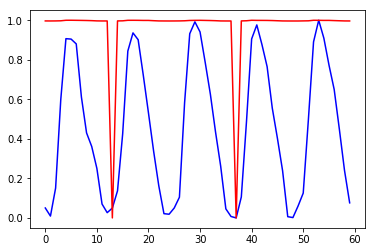

In [34]:
plt.figure()
plt.plot(gpp_ind_scaled, c='blue')
plt.plot(sif_ind_scaled, c='red')

- *The SIF plot looks strange...why is this?*

We see two sharp spikes instead of a continous timeseries. This is not normal. It likely indicates the presence of missing values in the SIF timeseries. This is not unlikely, as SIF are observations. We can check this by printing out the initial SIF data for this pixel in the box below

In [35]:
# type your commands here

In [37]:
print (sif_data[:,26,48])

[0.3702765107154846 0.1981554478406906 0.4116765558719635
 1.035319447517395 3.686494827270508 3.8327250480651855 3.4478652477264404
 3.0446674823760986 2.540574073791504 1.786563515663147 0.5650244951248169
 0.18942007422447205 0.23639816045761108 -- 0.3843936622142792
 0.875118613243103 3.474569320678711 3.5783183574676514 3.3874809741973877
 2.9115912914276123 2.863898992538452 1.5362201929092407
 0.3770902752876282 0.21828004717826843 0.10253697633743286
 0.2177988886833191 0.4275607764720917 1.1165016889572144
 2.7446603775024414 3.240485668182373 3.4689669609069824
 2.9180898666381836 2.357997417449951 1.5216645002365112
 0.31861981749534607 0.13427454233169556 0.06083620339632034 --
 0.3903891146183014 1.2109804153442383 3.6430702209472656
 3.150801658630371 3.0559260845184326 2.8290939331054688
 2.2804081439971924 1.2762112617492676 0.3125302493572235
 0.12079162895679474 0.0370614230632782 0.06269023567438126
 0.5199649930000305 0.9488006234169006 3.6417489051818848
 3.4724245

Indeed, there are two missing data points that have been masked (we can see the -- in two places). It is always tricky dealing with missing numbers! How do we deal with this? We can fill these points with NaNs using the numpy masked array filled function that we have come across before:

**np.ma.filled(sif_data[:,26,48], np.nan)**

However, the sklearn scaling and transform methods unfortunately don't deal with NaNs very well. The minmax_scale method throws an error if you have NaNs in your array. 

There are other more sophisticated scikit learn functions like the MinMaxScaler() function that you could use (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) but as it says on the manual page it will disregard NaNs when creating the fit() of the scaler, but include them again when it uses the transform() method to scale the data.

What else can we do? The calculation to scale between a min and a max is relatively simple - the equation is:

*scaled_data = data - min(data) / max(data) - min(data)*

We can use numpy functions np.nanmin and np.nanmax to find the minimum and maximum without including the NaNs, e.g. for the SIF data:

**sif_ind_scaled = ( sif_data[:,26,48] - np.nanmin(sif_data[:,26,48]) ) / ( np.nanmax(sif_data[:,26,48]) - np.nanmin(sif_data[:,26,48]) )**

Note this also works even if you have not filled masked array with NaNs where the missing values are - it still treats the masked values as the NaNs

Try all these commands in the box below and print the result to see what we get:

In [ ]:
# type your commands here

In [39]:
sif_data[:,26,48] = np.ma.filled(sif_data[:,26,48], np.nan)
sif_ind_scaled = ( sif_data[:,26,48] - np.nanmin(sif_data[:,26,48]) ) / ( np.nanmax(sif_data[:,26,48]) - np.nanmin(sif_data[:,26,48]) )
print (sif_ind_scaled)

[0.08778835833072662 0.04244159534573555 0.0986955538392067
 0.26299959421157837 0.9614744186401367 1.0 0.8986054062843323
 0.7923794984817505 0.6595717668533325 0.4609212577342987
 0.13909637928009033 0.04014018923044205 0.05251696705818176 --
 0.09150764346122742 0.22079332172870636 0.9056408405303955
 0.9329743981361389 0.8826966285705566 0.757319450378418
 0.7447544932365417 0.394966185092926 0.08958350867033005
 0.04774359613656998 0.017250094562768936 0.047616828233003616
 0.10288038849830627 0.2843877375125885 0.7133400440216064
 0.843969464302063 0.9041648507118225 0.7590315341949463
 0.6114704012870789 0.39113134145736694 0.07417896389961243
 0.025611625984311104 0.006263669114559889 -- 0.09308719635009766
 0.3092789649963379 0.9500338435173035 0.8203414678573608
 0.795345664024353 0.7355847954750061 0.5910288691520691
 0.32646459341049194 0.07257461547851562 0.02205943875014782 0.0
 0.006752129644155502 0.12722507119178772 0.24020548164844513
 0.9496856927871704 0.90507572889

The data are now scaled but we have kept the missing values out of the calculation and masked.

Now we can repeat our plt.plot() commands for both GPP and SIF below and see if we have a good correlation.

In [40]:
# type your commands here

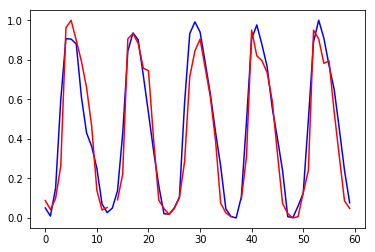

In [41]:
plt.figure()
plt.plot(gpp_ind_scaled, c='blue')
plt.plot(sif_ind_scaled, c='red')

Indeed, it looks like we have a great correlation between SIF and GPP! You could also plot a scatter plot between the GPP and SIF at this point and you would see a better correlation than when all the terrestrial points are included.

*What are some other ways we can deal with missing values?*

Pandas has neat and elegant methods for dealing with NaNs. We can import pandas, save SIF to a dataframe with masked values filled as NaNs like this:

**import pandas as pd**

**sif_df = pd.DataFrame({'SIF': np.ma.filled(sif_data[:,26,48], np.nan)})**

As you may remember from the DataCamp tutorial on Dictionaries and Pandas, this is a quick way of creating a pandas dataframe using {} to create a dictionary with a key of "SIF" and the "value" is the array of data. The key "SIF" then becomes the column header for the SIF data column. We then feed this dictionary into pd.DataFrame() to create the data frame.

One pandas method we can use to retrieve the indices of our data that are NaNs using the method "isnull()".

**null_index = sif_df['SIF'].isnull()**

Then we can repeat our sklearn minmax_scale() method using the sif_df with null indices removed, like this:

**sif_ind_scaled = minmax_scale(sif_df.loc[~null_index, ['SIF']])**  
Note! Other versions of pandas might require: **sif_ind_scaled = minmax_scale(sif_df.loc[~null_index, ['SIF']])** i.e. with no [ ] around 'SIF'.

The ~null_index in the [ ] using the pandas method df.loc means "take all indices *except* these indices (specified in null_index)".

Type these commands in the box below and print out the result of each line.

In [42]:
# type your commands here

In [43]:
import pandas as pd

sif_df = pd.DataFrame({'SIF': np.ma.filled(sif_data[:,26,48], np.nan)})
null_index = sif_df['SIF'].isnull()
sif_ind_scaled = minmax_scale(sif_df.loc[~null_index, ['SIF']]) # - minmax_scale(sif_df.loc[~null_index, 'SIF']) should also work depending on versions.

print (sif_df)
print (null_index)
print (sif_ind_scaled)

         SIF
0   0.370277
1   0.198155
2   0.411677
3   1.035319
4   3.686495
5   3.832725
6   3.447865
7   3.044667
8   2.540574
9   1.786564
10  0.565024
11  0.189420
12  0.236398
13       NaN
14  0.384394
15  0.875119
16  3.474569
17  3.578318
18  3.387481
19  2.911591
20  2.863899
21  1.536220
22  0.377090
23  0.218280
24  0.102537
25  0.217799
26  0.427561
27  1.116502
28  2.744660
29  3.240486
30  3.468967
31  2.918090
32  2.357997
33  1.521665
34  0.318620
35  0.134275
36  0.060836
37       NaN
38  0.390389
39  1.210980
40  3.643070
41  3.150802
42  3.055926
43  2.829094
44  2.280408
45  1.276211
46  0.312530
47  0.120792
48  0.037061
49  0.062690
50  0.519965
51  0.948801
52  3.641749
53  3.472425
54  3.006210
55  3.048799
56  2.072136
57  1.213682
58  0.364245
59  0.219512
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17 

Again, repeat your plotting code from above to see if you get the same result:

In [44]:
# type your commands here

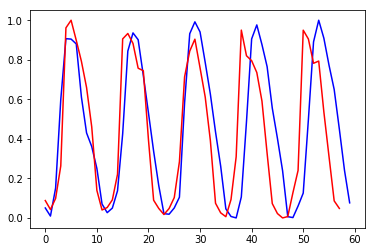

In [45]:
plt.figure()
plt.plot(gpp_ind_scaled, c='blue')
plt.plot(sif_ind_scaled, c='red')

- *Look carefully, is the plot the same as before? If not, how are they different and why is this the case?* Write your answer below:

[Hint: print the length of the gpp_ind_scaled and the sif_ind_scaled - why are they not the same?]

In [46]:
# type your commands here

In [47]:
print (len(gpp_ind_scaled), len(sif_ind_scaled))

60 58


The solution to this is that although all the values of GPP are present, because of two of the SIF values are missing we have to remove the equivalent values of GPP if we want to perform an actual statistical analysis that will compare point by point.

As we have seen, pandas has useful methods to provide an elegant solution to dealing with NaNs. If we create a pandas dataframe for GPP we can use the same null_index indices that show us where the missing SIF points are to also remove the equivalent GPP pixels. Can you think how to do that? Create a pandas dataframe for the GPP data in the box below, re-scale the GPP data by excluding the **SIF** missing data points, then re-plot the graph one more time.

In [48]:
# type your commands here

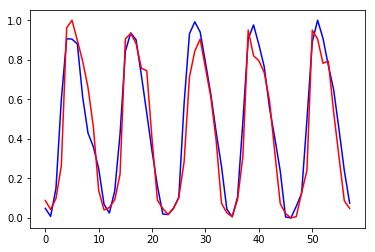

In [49]:
gpp_df = pd.DataFrame({'GPP': np.ma.filled(gpp_data[:,26,48], np.nan)})
gpp_ind_scaled = minmax_scale(gpp_df.loc[~null_index, ['GPP']])
plt.figure()
plt.plot(gpp_ind_scaled, c='blue')
plt.plot(sif_ind_scaled, c='red')

Hooray, the curves now line up better again with two points remove that correspond to the indices of the missing SIF data. Be sure you understand the differences between these three red and blue timeseries plots.

Another way to deal with missing data is to "gap-fill". For example, the SIF data only had two missing points. It would have been easy to simply fill these points by taking an average of the two adjacent points before and after. We learned how to do this in the DataCamp pandas tutorial. However, if you have large chunks of data missing then this can be a trickier issue. 

*Note that if we were actually plotting a timeseries of data to show in a publication (with a proper date on the x-axis) we would not want to simply remove those missing data points as we have done in that final graph. For plotting time series we would show the missing data points by filling them with np.nans (that matplotlib would ignore). But if we want to perform statistical analyses, and you don't want to gap-fill the data, the pandas methods above can remove these points before we calculate a correlation.*

### 3. Quick statistical analysis of the relationship between GPP and SIF using the SciPy library

We can use the SciPy (the scientific computing tools for Python package - https://www.scipy.org) statistical functions to calculate the pearson correlation coefficient (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html). We will learn more about Scipy in the last part of the semester.

You will need to import the scipy pearsonr package in the box below using the code:

**from scipy.stats import pearsonr**

Then calculate the pearson correlation coefficient between the scaled GPP and SIF data for the Indiana pixel using the following:

**correlation, pvalue = pearsonr(gpp_ind_scaled, sif_ind_scaled)**

Note that the pearsonr method gives both the correlation and its associated pvalue. Right now we're only interested in the correlation.

Type your code in the box below and print the correlation. Is it what you expected based on your plots above?

In [50]:
# type your commands here

In [51]:
from scipy.stats import pearsonr
correlation, pvalue = pearsonr(gpp_ind_scaled, sif_ind_scaled)
print (correlation)

[0.95009834]


There are many more useful statistical analyses we can do with scipy that we won't cover now. A similar SciPy method for calculating the correlation and p-value, while also getting the slope and intercept of the linear regression, is scipy.stats.linregress: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

Unfortunately, most of these SciPy methods only deal with 1d arrays; therefore, if we want to compute the corelations for the whole globe we would have to loop over all the land pixels. We will think about this in the last part of the semester.

**That's it, you're done for today! Save this Jupyter Notebook and upload it to Canvas by 1pm Monday 21st October.**